In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
import pickle
import codecs
import collections
import keras.preprocessing
from sklearn.model_selection import KFold
import csv

Using TensorFlow backend.


In [3]:
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding,TimeDistributed,Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import GRU, Dropout
from keras.models import load_model
from keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence
from keras import backend as K
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers import Embedding,TimeDistributed,Flatten
from keras.layers import BatchNormalization,Dropout


In [4]:
import seaborn as sns
sns.set(style="darkgrid")

In [5]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})
#fill your code here

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [7]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [8]:
input_standard = pd.read_csv('../../data/the_standard_data_with_features.csv')

In [9]:
input_standard.drop('Unnamed: 0', axis=1, inplace=True)
input_standard.drop('content', axis=1,inplace=True)
input_standard.drop('share', axis=1, inplace=True)
input_standard.drop('like', axis=1, inplace=True)
input_standard.drop('comment', axis=1, inplace=True)
input_standard.drop('time', axis=1, inplace=True)

In [10]:
input_standard.describe()

,Unnamed: 0.1,view,numToken,numChar,timeDelta,num_noun,num_pronoun,num_verb,num_preverb,num_determiner,num_adverb,num_classifier,num_conjunction,num_preposition,num_interjunction,num_prefix,num_ending,num_negator,num_punctuation,nnoun_per_ntoken,nverb_per_ntoken,nadverb_per_ntoken,is_Now & Next 2018,is_Business,is_Living,is_Special Report,is_Special Story,is_Now & Next 2019,is_ณัฐพงศ์ ดวงแก้ว,is_Sport,is_Harry And Meghan,is_สโรจ เลาหศิริ,is_LGBTQ,is_World Cup 2018 Features,is_Wellness,is_Grooming,is_Guest,is_King Rama 9,is_News,is_Science,is_ธิดากานต์ รุจิพัฒนกุล,is_Thailand,is_Editor’s Desk,is_โสภณ ศุภมั่งมี,is_Fashion,is_World Cup 2018 Analysis,is_Eat & Drink,is_Beauty,is_Lifestyle,is_Politics,is_nan,is_ศิโรตม์ คล้ามไพบูลย์,is_TV & Entertainment,is_WORLD CUP 2018,is_World,is_Art & Design,is_Environment,is_China,is_Tech,is_โตมร ศุขปรีชา,is_POP,is_King Rama9 2018,is_Oscars 2018,is_เคท ครั้งพิบูลย์,is_Book,is_Travel,is_Film,is_Sex & Relationships,is_เมธา พันธุ์วราทร,is_World Cup 2018 Fixtures,is_Music,is_On this day,is_Entertainment,is_Event,is_อาจวรงค์ จันทมาศ,is_Culture,tag_pop_sum,tag_pop_mean,num_date,num_email,num_law,num_len,num_location,num_money,num_organization,num_percent,num_person,num_phone,num_time,num_url,num_person_2,num_pos,num_neg,sim_top,sim_worst,tag_top_pop_sum,tag_top_pop_mean,num_tag_pop,tag_top_worst_sum,tag_top_worst_mean,num_tag_worst,numTag,month,year
count,10169.000000,1.016900e+04,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.00000,10169.000000,10169.000000,10169.0,10169.000000,10169.0,10169.0,10169.0,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.0,10169.0,10169.0,10169.000000,10169.000000,10169.000000,10169.0,10169.000000,10169.0,10169.000000,10169.0,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.00000
mean,5084.000000,4.366047e+03,10.143574,52.503589,300.972662,7.807257,0.008555,1.948471,0.008457,0.087718,0.041204,0.34851,0.001377,0.039630,0.0,0.000098,0.0,0.0,0.0,0.781663,0.184748,0.004056,0.002950,0.129216,0.006589,0.000098,0.000197,0.001278,0.000098,0.108664,0.002360,0.000098,0.010621,0.001770,0.002262,0.000197,0.000590,0.025076,0.005212,0.008064,0.000098,0.440260,0.000098,0.000197,0.001082,0.001770,0.001868,0.000295,0.000295,0.176222,0.000098,0.000197,0.004327,0.016521,0.261186,0.001573,0.035697,0.019963,0.067558,0.000098,0.003737,0.000787,0.000197,0.000098,0.001082,0.002360,0.001770,0.001180,0.003048,0.000197,0.002557,0.003442,0.004524,0.000885,0.001770,0.000098,229.308093,57.917986,0.000197,0.0,0.0,0.0,0.083489,0.031075,0.154882,0.0,0.242895,0.0,0.000885,0.0,0.098240,0.286557,0.308782,0.740403,0.742623,28.000000,9.452257,2.699184,16.704297,6.347035,2.153112,4.598879,6.312715,2017.99233
std,2935.681778,9.892414e+04,3.262216,16.044177,187.730884,2.647651,0.102225,1.472172,0.092645,0.305946,0.204622,0.62145,0.037081,0.200076,0.0,0.009917,0.0,0.0,0.0,0.156735,0.125872,0.021593,0.054238,0.335456,0.080907,0.009917,0.014023,0.035734,0.009917,0.311232,0.048526,0.009917,0.102512,0.042037,0.047507,0.014023,0.024285,0.156364,0.072009,0.089440,0.009917,0.496443,0.009917,0.01402

In [11]:
input_standard[:50]

,Unnamed: 0.1,headline,date,view,category,tag,DOW,token,numToken,numChar,timeDelta,num_noun,num_pronoun,num_verb,num_preverb,num_determiner,num_adverb,num_classifier,num_conjunction,num_preposition,num_interjunction,num_prefix,num_ending,num_negator,num_punctuation,nnoun_per_ntoken,nverb_per_ntoken,nadverb_per_ntoken,is_Now & Next 2018,is_Business,is_Living,is_Special Report,is_Special Story,is_Now & Next 2019,is_ณัฐพงศ์ ดวงแก้ว,is_Sport,is_Harry And Meghan,is_สโรจ เลาหศิริ,is_LGBTQ,is_World Cup 2018 Features,is_Wellness,is_Grooming,is_Guest,is_King Rama 9,is_News,is_Science,is_ธิดากานต์ รุจิพัฒนกุล,is_Thailand,is_Editor’s Desk,is_โสภณ ศุภมั่งมี,is_Fashion,is_World Cup 2018 Analysis,is_Eat & Drink,is_Beauty,is_Lifestyle,is_Politics,is_nan,is_ศิโรตม์ คล้ามไพบูลย์,is_TV & Entertainment,is_WORLD CUP 2018,is_World,is_Art & Design,is_Environment,is_China,is_Tech,is_โตมร ศุขปรีชา,is_POP,is_King Rama9 2018,is_Oscars 2018,is_เคท ครั้งพิบูลย์,is_Book,is_Travel,is_Film,is_Sex & Relationships,is_เมธา พันธุ์วราทร,is_World Cup 2018 Fixtures,is_Music,is_On this day,is_Entertainment,is_Event,is_อาจวรงค์ จันทมาศ,is_Culture,tag_pop_sum,tag_pop_mean,num_date,num_email,num_law,num_len,num_location,num_money,num_organization,num_percent,num_person,num_phone,num_time,num_url,num_person_2,num_pos,num_neg,sim_top,sim_worst,tag_top_pop_sum,tag_top_pop_mean,num_tag_pop,tag_top_worst_sum,tag_top_worst_mean,num_tag_worst,numTag,month,year
0,0,สุดารัตน์การันตี มิ่งขวัญไม่เสียสัจจะ เชื่อประชาชนจะบอยคอตนักการเมืองขี้โกหก,2019-04-13,368,"Thailand,Politics","พรรคเพื่อไทย,สุดารัตน์ เกยุราพันธุ์,มิ่งขวัญ แสงสุวรรณ์,พรรคเศรษฐกิจใหม่",SAT,"สุดารัตน์การันตี,มิ่งขวัญ,สัจจะ,ประชาชน,บอย,คอต,เมือง,ขี้,โกหก",9,54,7,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,304,76,0,0,0,0,0,0,1,0,1,0,0,0,1,0,2,0.732773,0.722237,51,12,4,9,4,2,4,4,2019
1,1,สโมสรฟุตบอลซาน ลอเรนโซฯ ในอาร์เจนตินา ประกาศเซ็นสัญญานักฟุตบอลอาชีพหญิงฉบับแรกของประเทศรวดเดียว 15 คน,2019-04-13,22,Sport,"Argentina,San Lorenzo de Almagro",SAT,"สโมสรฟุตบอล,ซาน ลอเรนโซฯ,อาร์เจนตินา,ประกาศ,เซ็น,สัญญา,ฟุตบอล,อาชีพ,หญิง,ฉบับ,ประเทศ,รวดเดียว,คน",13,84,7,11,0,1,0,0,0,2,0,0,0,0,0,0,0,0.846154,0.076923,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.693959,1.000000,3,3,1,4,2,2,2,4,2019
2,2,ภาพข่าวยอดเยี่ยมประจำวันที่ 7-13 เมษายน 2562,2019-04-13,31,"World,Thailand",ภาพข่าวยอดเยี่ยม,SAT,"ภาพ,ข่าว,ยอดเยี่ยม,ประจำ,เมษายน,2562",6,31,7,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0.833333,0.166667,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,81,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.792388,1.000000,0,0,0,16,16,1,1,4,2019
3,3,สงกรานต์สีลม สีสันความสนุก กิจกรรมดับร้อนของคนกรุงเทพฯ,2019-04-13,280,Thailand,เทศกาลสงกรานต์,SAT,"สงกรานต์,สีลม,สี,สัน,สนุก,กิจกรรม,ดับ,ร้อน,คน,กรุงเทพฯ",10,45,7,7,0,1,0,0,1,1,0,0,0,0,0,0,0,0.700000,0.100000,0.100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,63,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.708988,0.640314,3,3,1,25,25,1,1,4,2019
4,4,14 April 2003 – โครงการศึกษาจีโนมของมนุษย์เสร็จสิ้น,2019-04-14,56,On this day,"พันธุกรรม,วิทยาศาสตร์",SUN,"April,2003,โครงการ,ศึกษา,จีโนม,มนุษย์",6,32,6,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0.833333,0.166667,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.689889,1.000000,2,2,1,2,1,2,2,4,2019
5,5,ผู้นำทหารซูดานประกาศปฏิรูปสถาบันรัฐ ขอเวลา 2 ปีจัดการเลือกตั้ง คืนอำนาจให้พลเรือน,2019-04-14,53,World,"Sudan,Abdel Fattah Abdelrahman Burhan",SUN,"ทหาร,ซูดาน,ประกาศ,ปฏิรูป,สถาบัน,รัฐ,เวลา,ปี,เลือกตั้ง,คืน,อำนาจ,พลเรือน",12,60,6,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0.833333,0.166667,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [12]:
input_standard['view'].describe()

count    1.016900e+04
mean     4.366047e+03
std      9.892414e+04
min      0.000000e+00
25%      3.780000e+02
50%      1.241000e+03
75%      2.612000e+03
max      8.744000e+06
Name: view, dtype: float64

In [14]:
IQRval = input_standard['view'].describe().loc['75%']-input_standard['view'].describe().loc['25%']

In [15]:
input_standard['view'].describe().loc['25%']

378.0

In [16]:
outlierMin = max(input_standard['view'].describe().loc['25%']-1.5*IQRval,0)
outlierMax = input_standard['view'].describe().loc['75%']+1.5*IQRval
print(outlierMin,outlierMax)

0 5963.0


In [17]:
len(input_standard)

10169

In [14]:
# MINVIEW = input_standard['view'].quantile(0.1)
# MAXVIEW = input_standard['view'].quantile(0.9)

In [15]:
# input_standard = input_standard[(input_standard['view']<=MAXVIEW) & (input_standard['view']>=MINVIEW)]

In [18]:
input_standard = input_standard[(input_standard['view']<=outlierMax) & (input_standard['view']>=outlierMin)]

In [19]:
# input_standard = input_standard[input_standard['year-month']< '2562-04' ]

In [20]:
MAXVIEW = input_standard['view'].max()
MAXVIEW

5962

In [21]:
view_mean = input_standard['view'].describe()['mean']
view_sd = input_standard['view'].describe()['std']

In [22]:
input_standard['view'].describe()

count    9444.000000
mean     1469.122723
std      1354.163981
min      0.000000   
25%      348.750000 
50%      915.000000 
75%      2260.250000
max      5962.000000
Name: view, dtype: float64

## Feature extraction

In [23]:
input_standard_train, input_standard_test = train_test_split(input_standard, test_size=0.2,random_state=100)

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['TH SarabunPSK'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


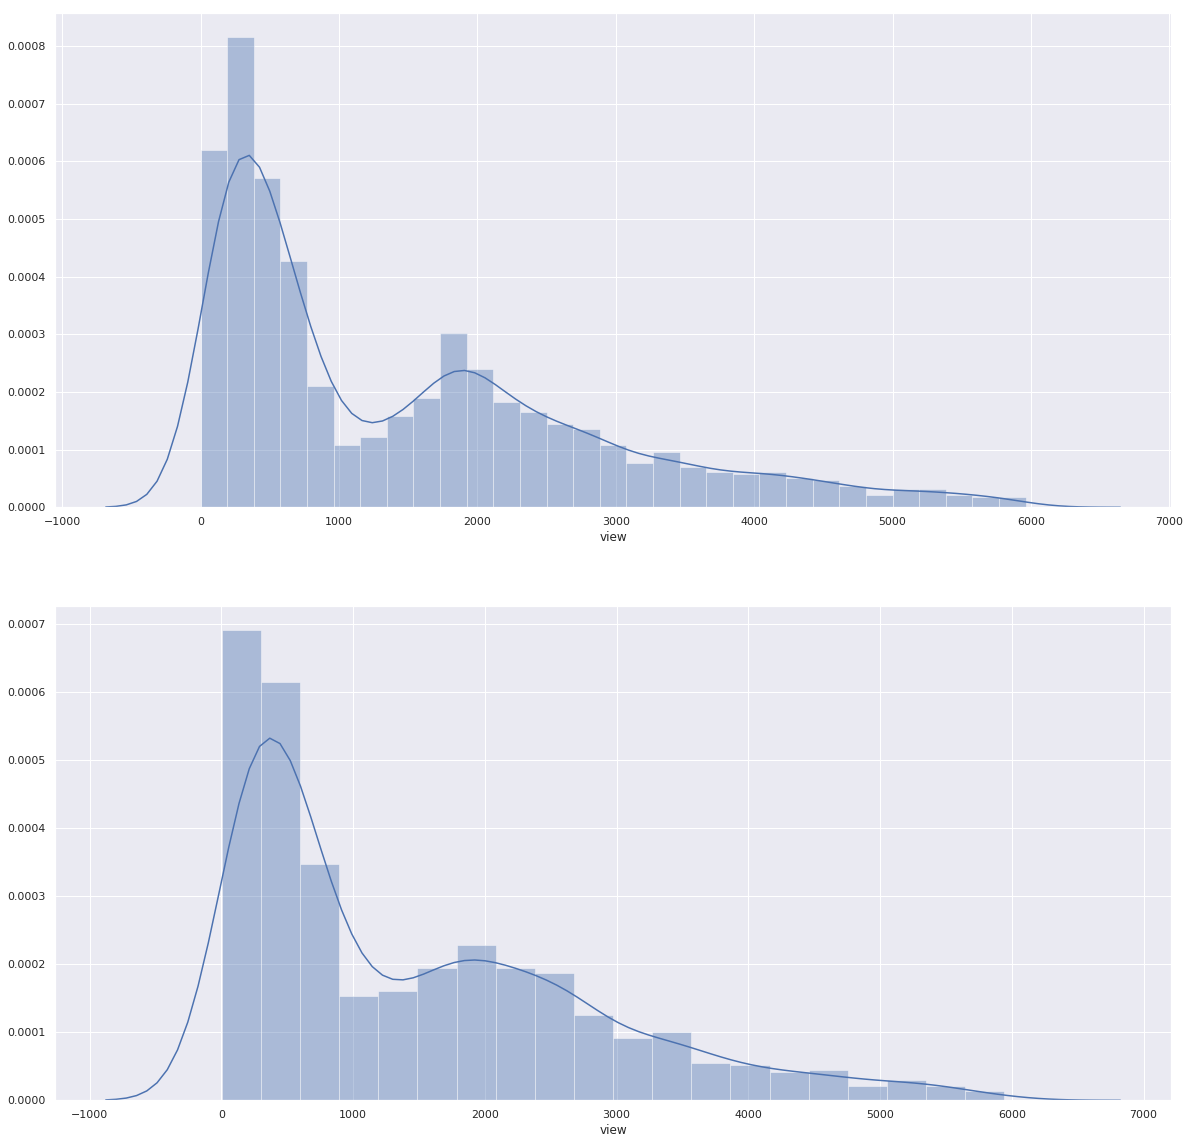

In [24]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(input_standard_train['view'],ax=axarr[0])
sns.distplot(input_standard_test['view'],ax=axarr[1])

## Bag of word feature

In [25]:
inputText_train = []
for sent in input_standard_train['token']:
    inputText_train.append(sent.split(','))
    if(sent.split(',')[0]=='000'):
        print(sent)

000,ชีวิต,หมู,ป่า,เตรียม,งาน,เลี้ยง,กย,น้อง,ครอบครัว


In [26]:
inputText_test = []
for sent in input_standard_test['token']:
    inputText_test.append(sent.split(','))

In [27]:
np.log(input_standard_train['view']).describe()

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


count    7555.000000
mean    -inf        
std     NaN         
min     -inf        
25%      5.846439   
50%      6.809039   
75%      7.720462   
max      8.693161   
Name: view, dtype: float64

In [28]:
MAXVIEW_log = np.log(input_standard_train['view']).describe()['max']

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [29]:
MAXVIEW_log

8.693161274238017

In [30]:
MINVIEW_log = max(np.log(input_standard_train['view']).describe()['min'],0)

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [31]:
MINVIEW_log

0

In [32]:
MEANVIEW_log = np.log(input_standard_train['view']).describe()['mean']

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [33]:
diff_log = MAXVIEW_log-MINVIEW_log

In [34]:
inputLabel_train = []
for view in input_standard_train['view']:
#     inputLabel_train.append((view-view_mean)/view_sd)
#     inputLabel_train.append((np.log(view+0.00001)-MINVIEW_log)/diff_log)

    inputLabel_train.append(np.log(view+0.00001)/MAXVIEW_log)
#     inputLabel_train.append(view/MAXVIEW)

In [35]:
inputLabel_test = []
for view in input_standard_test['view']:
#     inputLabel_test.append((view-view_mean)/view_sd)
#     inputLabel_test.append((np.log(view+0.00001)-MINVIEW_log)/diff_log)
    inputLabel_test.append(np.log(view+0.00001)/MAXVIEW_log)

#     inputLabel_test.append(view/MAXVIEW)

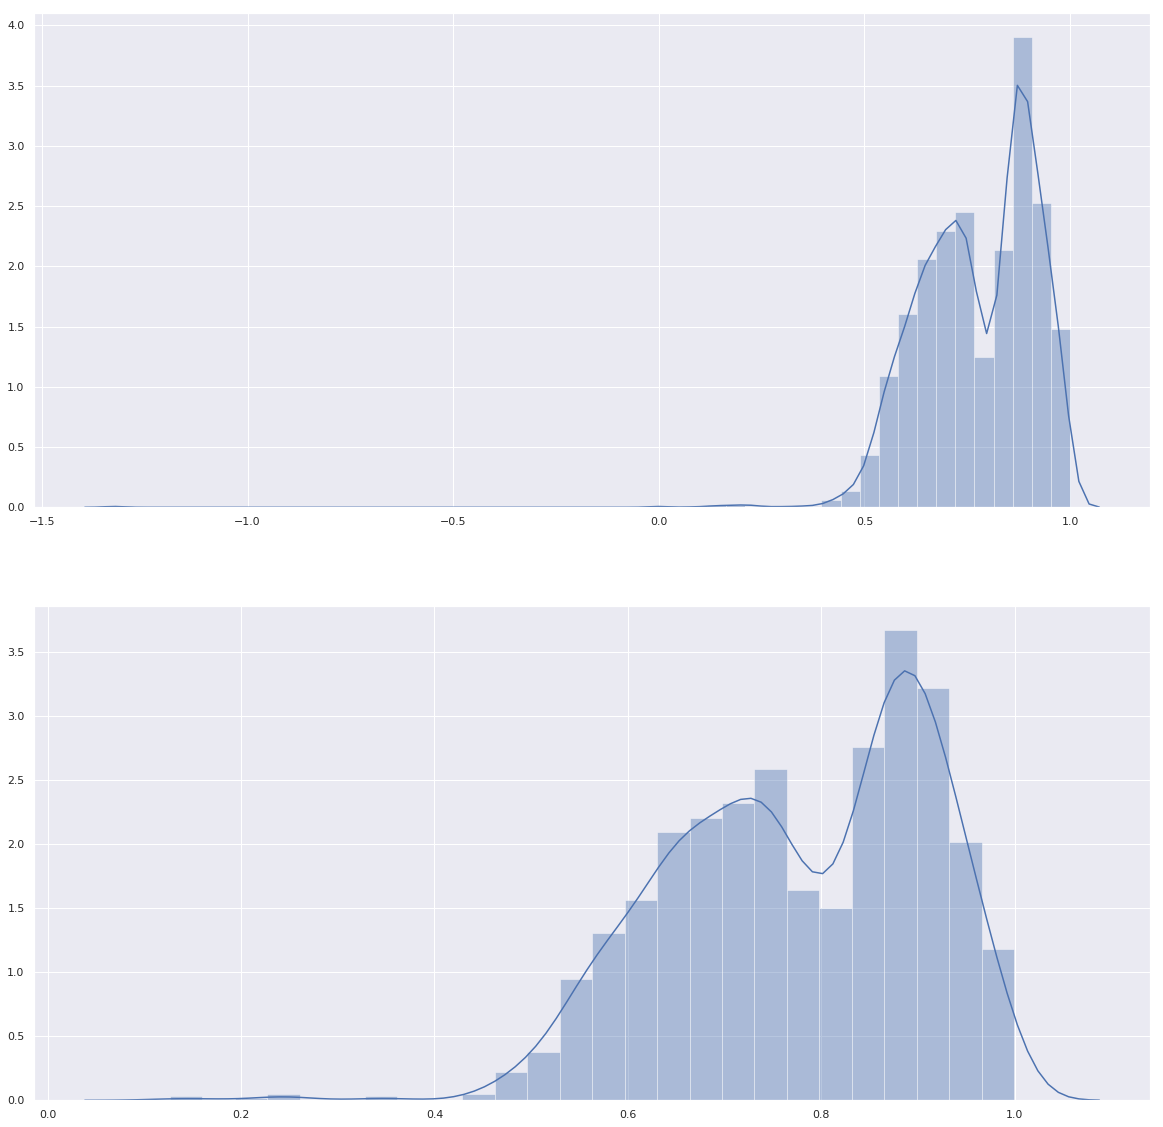

In [39]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(inputLabel_train,ax=axarr[0])
sns.distplot(inputLabel_test,ax=axarr[1])

In [40]:
print(len(inputText_train),len(inputLabel_train))

7555 7555


In [41]:
print(len(inputText_test),len(inputLabel_test))

1889 1889


In [42]:
words = []
for sentence in inputText_train:
    for word in sentence:
        words.append(word)
        
word_count = list()
word_count.extend(collections.Counter(words).most_common(len(set(words))))
word_count = word_count[:len(word_count)//4]
word_count.append(("UNK",0))

train_word = set()
for i in word_count:
    train_word.add(i[0])

In [43]:
len(word_count)

2825

In [44]:
all_token = set()
for word in train_word:
    all_token.add(word)

In [45]:
all_token = list(all_token)
all_token.insert(0,'for padding')
all_token.insert(1,'UNK')

In [46]:
len(all_token)

2827

In [47]:
token_map = dict(zip(all_token, range(len(all_token))))
token_map_reverse = dict(zip(range(len(all_token)),all_token))

In [48]:
input_data_train = np.asarray(input_standard_train['token'].str.split(','))
input_data_test = np.asarray(input_standard_test['token'].str.split(','))

In [49]:
def count_word(sent):
    global all_token, token_map
    result = np.zeros(len(all_token))
    np_token = np.array(sent)
    str_token, str_token_count = np.unique(np_token, return_counts=True)
    for char, count in zip(str_token, str_token_count):
        if char not in token_map.keys():
            char = 'UNK'
        result[token_map[char]] = count
    return result

In [50]:
temp_train = np.vectorize(count_word, otypes=[object])(input_data_train)
x_f1_train = np.array([[e for e in sl] for sl in temp_train.tolist()])
temp_test = np.vectorize(count_word, otypes=[object])(input_data_test)
x_f1_test = np.array([[e for e in sl] for sl in temp_test.tolist()])

In [51]:
x_f1_train.shape

(7555, 2827)

## Numerical feature

In [52]:
input_standard.columns[:50]

Index(['Unnamed: 0.1', 'headline', 'date', 'view', 'category', 'tag', 'DOW',
       'token', 'numToken', 'numChar', 'timeDelta', 'num_noun', 'num_pronoun',
       'num_verb', 'num_preverb', 'num_determiner', 'num_adverb',
       'num_classifier', 'num_conjunction', 'num_preposition',
       'num_interjunction', 'num_prefix', 'num_ending', 'num_negator',
       'num_punctuation', 'nnoun_per_ntoken', 'nverb_per_ntoken',
       'nadverb_per_ntoken', 'is_Now & Next 2018', 'is_Business', 'is_Living',
       'is_Special Report', 'is_Special Story', 'is_Now & Next 2019',
       'is_ณัฐพงศ์ ดวงแก้ว', 'is_Sport', 'is_Harry And Meghan',
       'is_สโรจ เลาหศิริ', 'is_LGBTQ', 'is_World Cup 2018 Features',
       'is_Wellness', 'is_Grooming', 'is_Guest', 'is_King Rama 9', 'is_News',
       'is_Science', 'is_ธิดากานต์ รุจิพัฒนกุล', 'is_Thailand',
       'is_Editor’s Desk', 'is_โสภณ ศุภมั่งมี'],
      dtype='object')

In [53]:
input_standard.columns[50:]

Index(['is_Fashion', 'is_World Cup 2018 Analysis', 'is_Eat & Drink',
       'is_Beauty', 'is_Lifestyle', 'is_Politics', 'is_nan',
       'is_ศิโรตม์ คล้ามไพบูลย์', 'is_TV & Entertainment', 'is_WORLD CUP 2018',
       'is_World', 'is_Art & Design', 'is_Environment', 'is_China', 'is_Tech',
       'is_โตมร ศุขปรีชา', 'is_POP', 'is_King Rama9 2018', 'is_Oscars 2018',
       'is_เคท ครั้งพิบูลย์', 'is_Book', 'is_Travel', 'is_Film',
       'is_Sex & Relationships', 'is_เมธา พันธุ์วราทร',
       'is_World Cup 2018 Fixtures', 'is_Music', 'is_On this day',
       'is_Entertainment', 'is_Event', 'is_อาจวรงค์ จันทมาศ', 'is_Culture',
       'tag_pop_sum', 'tag_pop_mean', 'num_date', 'num_email', 'num_law',
       'num_len', 'num_location', 'num_money', 'num_organization',
       'num_percent', 'num_person', 'num_phone', 'num_time', 'num_url',
       'num_person_2', 'num_pos', 'num_neg', 'sim_top', 'sim_worst',
       'tag_top_pop_sum', 'tag_top_pop_mean', 'num_tag_pop',
       'tag_top_worst_sum',

In [54]:
numerical_feature = [
       'numTag', 'numToken', 'numChar','timeDelta', 'num_noun', 'num_pronoun', 'num_verb',
       'num_preverb', 'num_determiner', 'num_adverb', 'num_classifier',
       'num_conjunction', 'num_preposition', 'num_interjunction', 'num_prefix',
       'num_ending', 'num_negator', 'num_punctuation',
       'nnoun_per_ntoken', 'nverb_per_ntoken', 'nadverb_per_ntoken',
       'num_date', 'num_email', 'num_law', 'num_len', 'num_location',
       'num_money', 'num_organization', 'num_percent', 'num_person',
       'num_phone', 'num_time', 'num_url', 'num_person_2', 'num_pos',
       'num_neg', 'sim_top', 'sim_worst', 'tag_pop_sum',
       'tag_pop_mean', 'tag_top_pop_sum', 'tag_top_pop_mean', 'num_tag_pop',
       'tag_top_worst_sum', 'tag_top_worst_mean', 'num_tag_worst']

# numerical_feature = ['num_tag_pop','tag_top_pop_sum', 'tag_top_pop_mean','sim_top','numTag','tag_pop_sum',
#                      'num_person','num_classifier','tag_pop_mean','timeDelta','num_tag_worst',
#                      'tag_top_worst_sum', 'tag_top_worst_mean','numChar','num_location','sim_worst',
#                     'num_verb','num_noun','nverb_per_ntoken']

# numerical_feature = ['num_tag_pop','tag_top_pop_sum', 'tag_top_pop_mean','sim_top','numTag','tag_pop_sum',
#                      'num_person','num_classifier','tag_pop_mean']

# numerical_feature = ['num_tag_pop','tag_top_pop_sum', 'tag_top_pop_mean','sim_top','numTag','tag_pop_sum',
#                      'num_person','num_classifier','tag_pop_mean','timeDelta','sim_worst','numChar',
#                     'numTag','nnoun_per_ntoken','nverb_per_ntoken','numToken','num_noun','num_verb',
#                      'tag_top_worst_sum','num_neg','tag_top_worst_mean','num_person','num_classifier',
#                     'num_location','num_pos','num_tag_worst','num_organization']

In [55]:
len(numerical_feature)

46

In [56]:
cs = MinMaxScaler()

In [57]:
trainContinuous = cs.fit_transform(input_standard_train[numerical_feature])
testContinuous = cs.fit_transform(input_standard_test[numerical_feature])

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [58]:
trainContinuous.shape

(7555, 46)

## Categorial feature

In [59]:
categorial_feature = ['DOW',
        'month','year',
        'is_Now & Next 2018', 'is_Business', 'is_Living',
       'is_Special Report', 'is_Special Story', 'is_Now & Next 2019',
       'is_ณัฐพงศ์ ดวงแก้ว', 'is_Sport', 'is_Harry And Meghan',
       'is_สโรจ เลาหศิริ', 'is_LGBTQ', 'is_World Cup 2018 Features',
       'is_Wellness', 'is_Grooming', 'is_Guest', 'is_King Rama 9', 'is_News',
       'is_Science', 'is_ธิดากานต์ รุจิพัฒนกุล', 'is_Thailand',
       'is_Editor’s Desk', 'is_โสภณ ศุภมั่งมี', 'is_Fashion','is_World Cup 2018 Analysis', 'is_Eat & Drink', 'is_Beauty',
       'is_Lifestyle', 'is_Politics', 'is_nan', 'is_ศิโรตม์ คล้ามไพบูลย์',
       'is_TV & Entertainment', 'is_WORLD CUP 2018', 'is_World',
       'is_Art & Design', 'is_Environment', 'is_China', 'is_Tech',
       'is_โตมร ศุขปรีชา', 'is_POP', 'is_King Rama9 2018', 'is_Oscars 2018',
       'is_เคท ครั้งพิบูลย์', 'is_Book', 'is_Travel', 'is_Film',
       'is_Sex & Relationships', 'is_เมธา พันธุ์วราทร',
       'is_World Cup 2018 Fixtures', 'is_Music', 'is_On this day',
       'is_Entertainment', 'is_Event', 'is_อาจวรงค์ จันทมาศ', 'is_Culture']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','is_inter',
#                      'is_region','is_Wed','is_asian','is_south']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','hour','month']

In [60]:
len(categorial_feature)

57

In [61]:
lb = preprocessing.LabelBinarizer()

In [62]:
# zipBinarizer = lb.fit(input_standard["DOW"])
# trainCategorical_dow = zipBinarizer.transform(input_standard_train["DOW"])
# testCategorical_dow = zipBinarizer.transform(input_standard_test["DOW"])
# zipBinarizer = lb.fit(input_standard["month"])
# trainCategorical_month = zipBinarizer.transform(input_standard_train["month"])
# testCategorical_month = zipBinarizer.transform(input_standard_test["month"])
# zipBinarizer = lb.fit(input_standard["year"])
# trainCategorical_year = zipBinarizer.transform(input_standard_train["year"])
# testCategorical_year = zipBinarizer.transform(input_standard_test["year"])
# zipBinarizer = lb.fit(input_standard["hour"])
# trainCategorical_hour = zipBinarizer.transform(input_standard_train["hour"])
# testCategorical_hour = zipBinarizer.transform(input_standard_test["hour"])
# zipBinarizer = lb.fit(input_standard["category"])
# trainCategorical_category = zipBinarizer.transform(input_standard_train["category"])
# testCategorical_category = zipBinarizer.transform(input_standard_test["category"])
# zipBinarizer = lb.fit(input_standard["sentiment"])
# trainCategorical_sentiment = zipBinarizer.transform(input_standard_train["sentiment"])
# testCategorical_sentiment = zipBinarizer.transform(input_standard_test["sentiment"])

## Concat feature

In [63]:
tmp_train = np.hstack([x_f1_train, trainContinuous])
tmp_test = np.hstack([ x_f1_test, testContinuous])
print(tmp_train.shape)

for f in categorial_feature:
    zipBinarizer = lb.fit(input_standard[f])
    trainCategorical = zipBinarizer.transform(input_standard_train[f])
    testCategorical = zipBinarizer.transform(input_standard_test[f])
    tmp_train = np.hstack([tmp_train,trainCategorical])
    tmp_test = np.hstack([tmp_test,testCategorical])

(7555, 2873)


In [64]:
x_train = tmp_train
x_test = tmp_test

In [65]:
x_train.shape

(7555, 2949)

In [66]:
x_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [67]:
# x_train = np.hstack([x_f1_train, trainContinuous,trainCategorical_dow,trainCategorical_month,trainCategorical_year,
#                      trainCategorical_hour,trainCategorical_category,trainCategorical_sentiment])
# x_test = np.hstack([x_f1_test, testContinuous,testCategorical_dow,testCategorical_month,testCategorical_year,
#                     testCategorical_hour,testCategorical_category,testCategorical_sentiment])

In [68]:
# x_train = np.hstack([x_f1_train,trainCategorical_dow,trainCategorical_hour,trainCategorical_category])
# x_test = np.hstack([x_f1_test,testCategorical_dow,testCategorical_hour,testCategorical_category])

In [69]:
# x_train = np.hstack([x_f1_train, trainContinuous])
# x_test = np.hstack([x_f1_test, testContinuous])

## Prepare data for Keras

In [70]:
x_train, x_val = train_test_split(x_train, test_size=0.2,random_state=100)

In [71]:
x_train=keras.preprocessing.sequence.pad_sequences(x_train, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_val=keras.preprocessing.sequence.pad_sequences(x_val, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_test=keras.preprocessing.sequence.pad_sequences(x_test, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)


In [72]:
x_train.shape

(6044, 2949)

In [73]:
print("train size",x_train.shape)
print("val size",x_val.shape)
print("test size",x_test.shape)

train size (6044, 2949)
val size (1511, 2949)
test size (1889, 2949)


In [74]:
y_train = inputLabel_train
y_train = np.asarray(y_train).reshape(-1,1)
y_test = inputLabel_test
y_test = np.asarray(y_test).reshape(-1,1)

In [75]:
y_train, y_val = train_test_split(y_train, test_size=0.2,random_state=100)

In [76]:
# y_train, y_test =  train_test_split(y_train, test_size=0.2,random_state=1)

In [77]:
print("train size",y_train.shape)
print("train size",y_val.shape)
print("test size",y_test.shape)

train size (6044, 1)
train size (1511, 1)
test size (1889, 1)


## Create Model

In [78]:
def create_model():
#     x_train2 = x_train.reshape(x.shape[0], 1, x.shape[1])
    input1 = Input(shape=(x_train.shape[1],))
#     x = LSTM(32)(input1)
#     x = Dense(256, activation='relu')(input1)
#     x = Dropout(0.3)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(128, activation='relu')(input1)
#     x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(64, activation='relu')(input1)
#     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(32, activation='relu')(x)
#     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(16, activation='relu')(x)
#     x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

    x = Dense(2048, activation='relu')(input1)
    x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

    x = Dense(1,activation='linear')(x)
    model = Model(inputs=input1, outputs=x)
    adam  = Adam(lr=0.0001)
    model.compile(optimizer=adam,  loss='mse')
    
    return model


In [79]:
model = create_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2949)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              6041600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)      

In [80]:
weight_path='./model_standard_2.h5'
callbacks_list = [
        ModelCheckpoint(
            weight_path,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
]

In [81]:
model.fit(x_train, y_train, 
          batch_size=32 ,epochs=50, verbose=1, validation_data=[x_val,y_val], callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 6044 samples, validate on 1511 samples
Epoch 1/50


ResourceExhaustedError: OOM when allocating tensor with shape[256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training/Adam/mul_28}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node loss/mul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [106]:
weight_model='./model_standard_2.h5'
model = create_model()
model.load_weights(weight_model)
# model._make_predict_function()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 2722)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 2048)              5576704   
_________________________________________________________________
dropout_16 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_17 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
__________

## Evaluate Model

In [107]:
y_pred = model.predict(x_test)

In [91]:
mse = np.sqrt(mean_squared_error(y_pred, y_test))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred, y_test)
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 0.22352047025259483
rmse : 0.4727795154748087
mae : 0.15317393442089405


In [231]:
np.exp(y_pred*MAXVIEW_log).shape

(3456, 1)

In [243]:
mse = np.sqrt(mean_squared_error((y_pred*view_sd)+view_mean, (y_test*view_sd)+view_mean))
rmse = np.sqrt(mse)
mae = mean_absolute_error((y_pred*view_sd)+view_mean,(y_test*view_sd)+view_mean)
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 127.57966705448854
rmse : 11.295116956211146
mae : 102.66271447241327


In [108]:
mse = np.sqrt(mean_squared_error(np.exp(y_pred*MAXVIEW_log), np.exp(y_test*MAXVIEW_log)))
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.exp(y_pred*MAXVIEW_log), np.exp(y_test*MAXVIEW_log))
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 1228.6627504455184
rmse : 35.05228595178235
mae : 951.1337570630467


In [449]:
mse = np.sqrt(mean_squared_error(np.exp(y_pred*MAXVIEW_log), np.exp(y_test*MAXVIEW_log)))
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.exp((y_pred*diff_log)+MINVIEW_log), np.exp((y_test*diff_log)+MINVIEW_log))
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 639.0571076997442
rmse : 25.279578867135903
mae : 559.6654030481974


In [92]:
mse = np.sqrt(mean_squared_error(y_pred*MAXVIEW, y_test*MAXVIEW))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred*MAXVIEW, y_test*MAXVIEW)
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 786.1214934142529
rmse : 28.037858217314906
mae : 538.7127265223751


In [109]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model.predict(x_train),y_train )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

AttributeError: module 'seaborn' has no attribute 'plt'

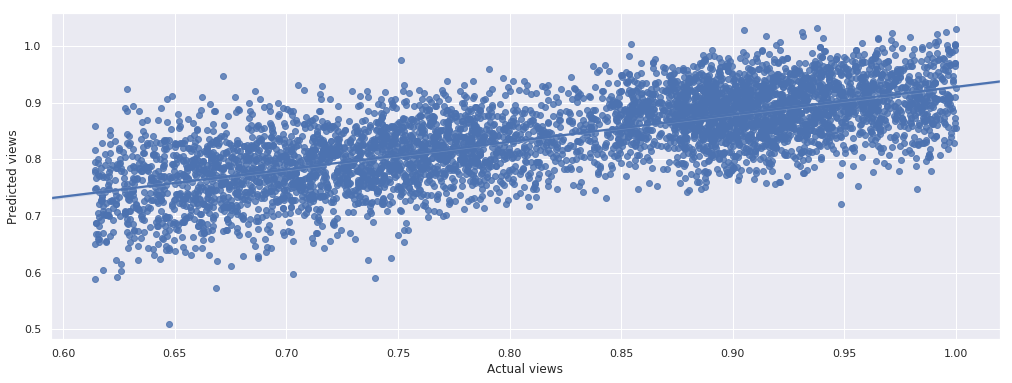

In [110]:
f, ax = plt.subplots(figsize=(17,6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


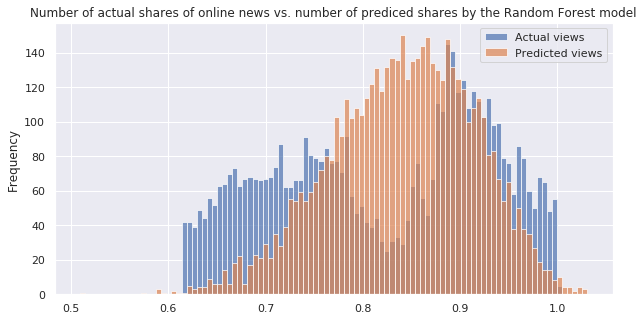

In [111]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [112]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model.predict(x_test),y_test )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

AttributeError: module 'seaborn' has no attribute 'plt'

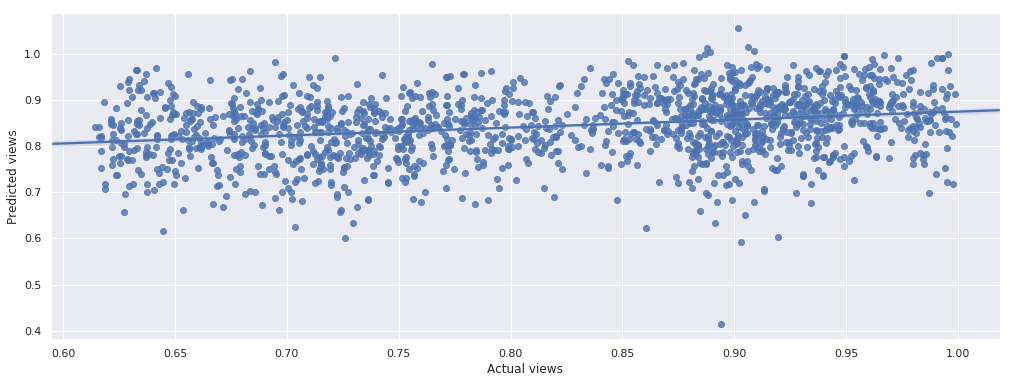

In [113]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

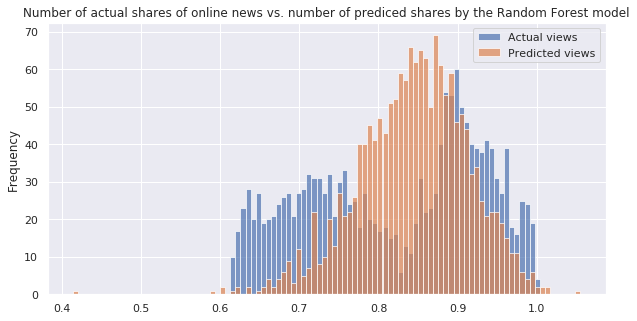

In [114]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [115]:
from sklearn.metrics import r2_score

r2_score( y_pred, y_test)

-1.732174568767522

In [217]:
for i in range(0,50):
#     print(y_test[i],y_pred[i])
    print(np.exp(y_pred[i]*MAXVIEW_log),np.exp(y_test[i]*MAXVIEW_log))

[1901.3523] [2052.]
[1849.01] [5545.]
[1551.3739] [441.]
[2003.6561] [2857.]
[2000.873] [555.]
[1611.3185] [2666.]
[1308.3777] [1607.]
[2265.0645] [444.]
[1574.0426] [510.]
[922.70856] [1250.]
[1419.4777] [2186.]
[1622.566] [758.]
[2239.016] [2899.]
[1956.0585] [5661.]
[3967.6328] [4591.]
[1873.5408] [783.]
[1359.0626] [785.]
[2047.338] [527.]
[630.5866] [4740.]
[796.43744] [2028.]
[1362.0417] [1451.]
[1868.9714] [2705.]
[1730.6967] [389.]
[1806.188] [3568.]
[3529.9392] [3401.]
[1594.673] [2690.]
[1205.2667] [643.]
[2023.3633] [1309.]
[1518.8589] [767.]
[1112.147] [771.]
[1735.1223] [400.]
[1001.319] [552.]
[1001.3538] [2956.]
[371.77618] [408.]
[1255.779] [2178.]
[2403.3945] [4344.]
[2223.8442] [666.]
[1114.697] [4214.]
[2345.9922] [4581.]
[3192.3906] [3157.]
[1283.8217] [493.]
[1927.7878] [1840.]
[2746.4988] [3931.]
[1802.6509] [519.]
[2135.4065] [585.]
[1965.1427] [1377.]
[784.3995] [475.]
[2590.5496] [678.]
[1285.5853] [1858.]
[2586.1978] [1718.]


In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

ImportError: Traceback (most recent call last):
  File "/home/burin/py_36_env/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/burin/py_36_env/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/burin/py_36_env/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/home/burin/py_36_env/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/home/burin/py_36_env/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.10.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.